Significant Correlations (|correlation| > 0.5):
target  target     
's      's             1.000000
        NICU           1.000000
        angry          0.707011
        another        0.577194
        aqueous        1.000000
                         ...   
zooms   offshore       0.707011
        pans           1.000000
        silhouetted    1.000000
        thermometer    1.000000
        zooms          1.000000
Length: 115694, dtype: float64

Correlation Matrix Preview:
target        's         -       1st         2         4        5k         9  \
target                                                                         
's      1.000000 -0.000271 -0.000271 -0.000469 -0.000271 -0.000383 -0.000271   
-      -0.000271  1.000000 -0.000271 -0.000469 -0.000271 -0.000383 -0.000271   
1st    -0.000271 -0.000271  1.000000 -0.000469 -0.000271 -0.000383 -0.000271   
2      -0.000469 -0.000469 -0.000469  1.000000 -0.000469 -0.000664 -0.000469   
4      -0.000271 -0.000271 -0.000271 -0.

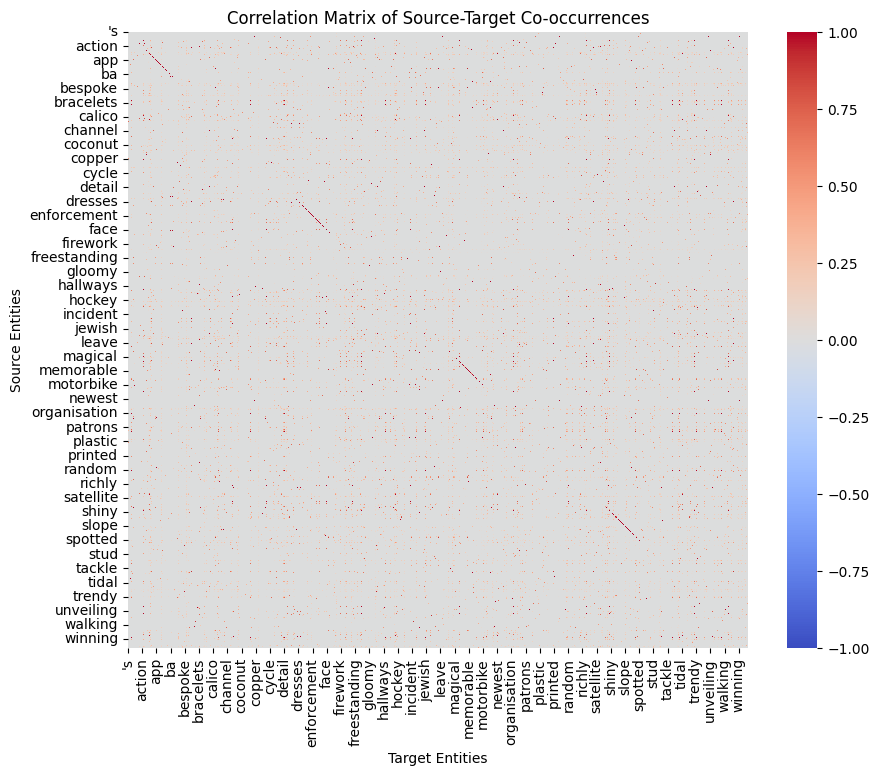

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv("kG_nlp_transformed.csv")

# Step 1: Convert textual data to numerical features using frequency-based encoding
# Create a pivot table for source-target co-occurrence frequencies
co_occurrence = pd.pivot_table(df,
                               index='source',
                               columns='target',
                               values='relation',
                               aggfunc='count',
                               fill_value=0)

# Step 2: Calculate the correlation matrix using Pearson correlation
correlation_matrix = co_occurrence.corr(method='pearson')

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=False,  # Not annotating values due to large matrix size
            cmap='coolwarm',
            vmin=-1, vmax=1,
            center=0)
plt.title("Correlation Matrix of Source-Target Co-occurrences")
plt.xlabel("Target Entities")
plt.ylabel("Source Entities")

# Save the heatmap to a file
plt.savefig('correlation_matrix.png')

# Step 4: Identify significant correlations (e.g., absolute value > 0.5)
significant_correlations = correlation_matrix[abs(correlation_matrix) > 0.5].stack()
print("Significant Correlations (|correlation| > 0.5):")
if significant_correlations.empty:
    print("No significant correlations found.")
else:
    print(significant_correlations)

# Optional: Display the correlation matrix
print("\nCorrelation Matrix Preview:")
print(correlation_matrix.head())